# Linear Regression Prediction
Ahmed Sayed

#### Problem Statement

The problem we are working on is that we have the number of study hours students have before studying for an exam, and their scores. And we want to make a model that can predict the score of the student given the number of study hours.

#### Problem Solution
The solution is to create a machine learning model and tell it the study hours. Then receive the prediction of the exam scores.

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


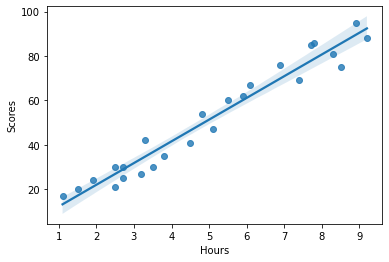

In [4]:
x, y = pd.Series(df.Hours, name="Hours"), pd.Series(df.Scores, name="Scores")
ax = sns.regplot(x=x, y=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.Hours.values, df.Scores.values, test_size=0.3, random_state=42)

In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [8]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.9487647340257012

In [9]:
y_pred = reg.predict(X_test)

In [10]:
x = []
for i in range(2):
    for val in X_test:
        x.append(val[0])

y = []
hue = []
for val in y_test:
    y.append(val)
    hue.append("True")
    
for val in y_pred:
    y.append(val)
    hue.append("Predicted")

In [11]:
pred_df = pd.DataFrame() 

In [12]:
pred_df["X"] = x
pred_df["Y"] = y
pred_df["Hue"] = hue

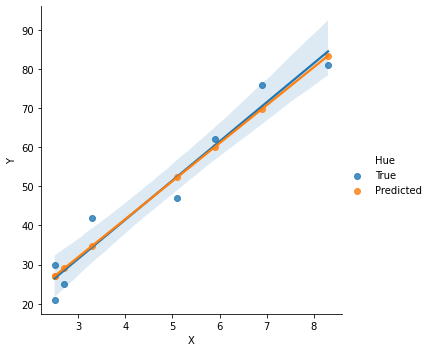

In [13]:
sns.lmplot(data=pred_df, x="X", y="Y", hue="Hue")

In [14]:
hour = np.array([9.25])
hour = hour.reshape(-1, 1)
reg.predict(hour)[0]

92.61670033840096

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.499999999999998
